C:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  101
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -249.429
Date:                Wed, 16 Mar 2022   AIC                            518.858
Time:                        10:57:27   BIC                            545.009
Sample:                             0   HQIC                           529.445
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4014      0.047     93.906      0.000       4.310       4.493
ar.L1          0.1839      0.169      1.088      0.277      -0.147       0.515
ar.L2         -0.2577      0.200     -1.289      0.1

C:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


array([ 0.        , -6.42726289,  5.1823533 , -4.34011607, -0.46897287,
       -0.33297124,  2.5749629 ,  4.93477999, -9.01805559, -1.08026609,
        3.07460054,  4.60153077, -3.15496943,  2.08751105, -3.97295731,
        0.95943209, -2.08344266,  3.07164477,  6.08837451, -9.16074074,
        5.55719166,  1.92747234, -2.15845267, -6.55359372,  7.94930064,
       -5.98388431,  1.76513894,  4.79299266, -8.51226302,  0.71598517,
        0.1493347 ,  0.14929425,  4.9704693 ,  1.02841716, -0.55464003,
       -0.93022136, -3.16222859,  4.79354751, -5.26504895,  7.58430679,
       -0.662205  , -7.57079643,  1.3415441 ,  7.29385764, -4.86381542,
       -2.86079178,  7.26215949, -8.73425028,  4.51583854, -1.81124992,
       -1.10352765,  5.67175116, -6.48238839,  5.55492232, -4.43739408,
        5.05425127,  0.18926815,  0.45636009, -3.40732249, -2.97348928,
        4.65022954, -5.27269285,  0.75816284, -0.4873418 ,  1.92059688,
        5.53855695, -8.5459499 ,  6.51688535, -5.2894145 ,  0.53

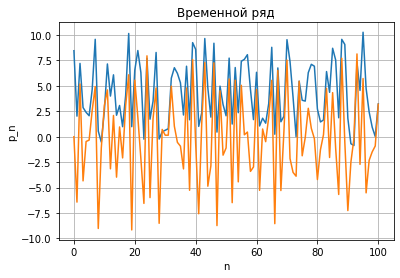

In [5]:
import numpy as np
# from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from math import sin
from random import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n_max = 102

# Задаем ряд
price_ser_src = pd.Series([sin(x) + 10*random() for x in range(1, n_max)])
# p_ser = price_ser_src[::5]

# Находим mu (тренд)
# Простой способ -- первая разность
mu_arr = np.array([price_ser_src[i]-price_ser_src[i-1] if i > 0 else 0. for i in range(len(price_ser_src)) ])

# Находим параметры ARMA (подгоняем модель)
model = ARIMA(price_ser_src, order=(4, 0, 4))
model_fit = model.fit()
print(model_fit.summary())

# make prediction -- это пока вообще не трогаем
# yhat = model_fit.predict(len(data), len(data))
# print(yhat)

# График
plt.title("Временной ряд") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(price_ser_src)
plt.plot(mu_arr)

# p_ser.reset_index(inplace=True, drop=True)
# p_ser

mu_arr


[100] [ 0.00000000e+00 -7.44367762e+00 -2.68819047e-01  2.35334996e+00
  2.06511056e+00 -5.89478051e+00  2.08145828e+00  3.40075979e+00
  2.97979391e+00 -4.84654265e+00  2.47366973e+00 -1.94173093e+00
 -7.22721673e-02  1.28609053e+00  1.08472567e+00 -3.91993348e+00
  1.78915661e+00 -5.91259132e+00  9.50208014e+00 -5.54828518e+00
  8.06607174e-03  4.51331259e+00 -6.42174283e+00  5.81657159e+00
 -1.73700996e+00 -5.58276149e-04  1.68558551e+00 -6.49516654e+00
  5.78687965e+00 -5.00648615e+00 -6.07217419e-01 -1.75873674e-01
  2.27242553e+00 -2.76053754e+00  1.34762368e+00  6.28942514e+00
 -5.87135363e-01 -5.15645818e+00  8.03309328e+00 -3.58270272e+00
  1.39444271e+00 -6.46426785e+00  5.33884560e+00 -1.91672395e+00
 -4.42807222e+00  9.68312411e+00 -9.71330427e+00  6.15415259e+00
  1.54338994e+00 -2.88659646e+00 -3.79953837e+00  3.02832131e+00
 -2.24035215e+00  3.95360757e+00  1.79486157e+00 -7.56591253e+00
  2.82742420e+00  1.68510400e+00 -3.92913733e+00  6.69167186e+00
 -4.77246109e+00  3

(array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
         -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
         -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
         -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
         -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
         -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
         -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
         -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
         -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
         -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
         -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
         -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
         -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
          0.50505051,   0.70707071,   0.90909091,   1.11111111,
          1.31313131,   1.51515152,   1.71717172,   1.91919192,
          2.12121212,   2.32323232,   2.

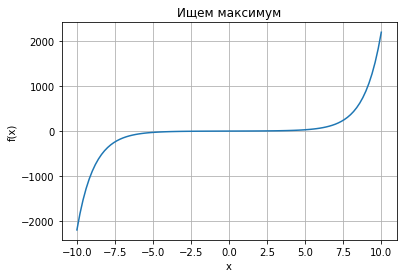

In [3]:
from scipy.optimize import minimize, minimize_scalar
import math
import functools


def math_exp(K: float, inv: float, mu: float, i: int):
    res = -inv/K * (math.exp(K*mu*i) + math.exp(-K*mu*i) - 2) 
    return res

def f(x):
    mu = 1
    t = 1
    return -1/x*(math.exp(x*mu*t) + math.exp(-x*mu*t) - 2)





# Считаем алгоритм

inv_0 = 100
inv_ser = [inv_0]

"""
for cnt, price in enumerate(price_ser_src):
    if cnt == 0:
        continue
    f = functools.partial(math_exp, inv = inv_ser[cnt-1], mu = mu[cnt-1], i=cnt-1)    
    K = minimize_scalar(f, bounds=(-1, 1), method='bounded', ).x
    inv_ser.append(K)
    
inv_ser
"""
print(inv_ser, mu_arr)


x_arr = np.linspace(-10, 10., 100)
f_arr = np.array([f(x_arr[i]) for i in range(len(x_arr))])



# f = functools.partial(math_exp, inv = 10, mu = 1, i=1)    
plt.title("Ищем максимум") # заголовок
plt.xlabel("x") # ось абсцисс
plt.ylabel("f(x)") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(x_arr, -f_arr)

x_arr, f_arr









## Данные для расчетов
Модельные данные: ряд ARMA(4, 4)
Реальные данные: 
- боковик USD-RUR 16.02.2022
- растущий тренд USD-RUR 17.02.2022

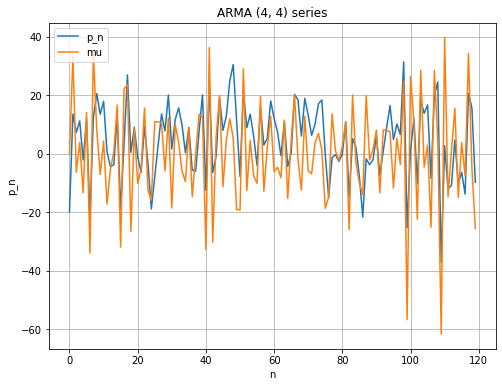

In [6]:
# Генерируем и визуализируем ARMA(4,4)-ряд
import random

n_max = 120

a = [10., 8., 6., 2., .1]
d = [1., .6, .4, .1, .06]

p = [-1., 3., .1, -.8, .5]
for i in range(5, n_max+5):
    p_next = a[0]*p[4] + a[1]*p[3] + a[2]*p[2] + a[3]*p[1] + a[4]*p[0]
    xi = np.random.normal(0., 10., 5)
    p_next += sum([d[i]*xi[i] for i in range(5)])
    p.append(p_next)
    
p_arr_arma = np.array(p[5:])
mu_arr_arma = np.diff(p_arr_arma)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr_arma = np.append(0., mu_arr_arma)

n_lst = list(range(n_max))

figure = plt.figure(figsize=(8, 6))
plt.title("ARMA (4, 4) series") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_arma, mu_arr_arma)
plt.legend(['p_n', 'mu'], loc="upper left")

plt.show()
# p_arr, mu_arr 


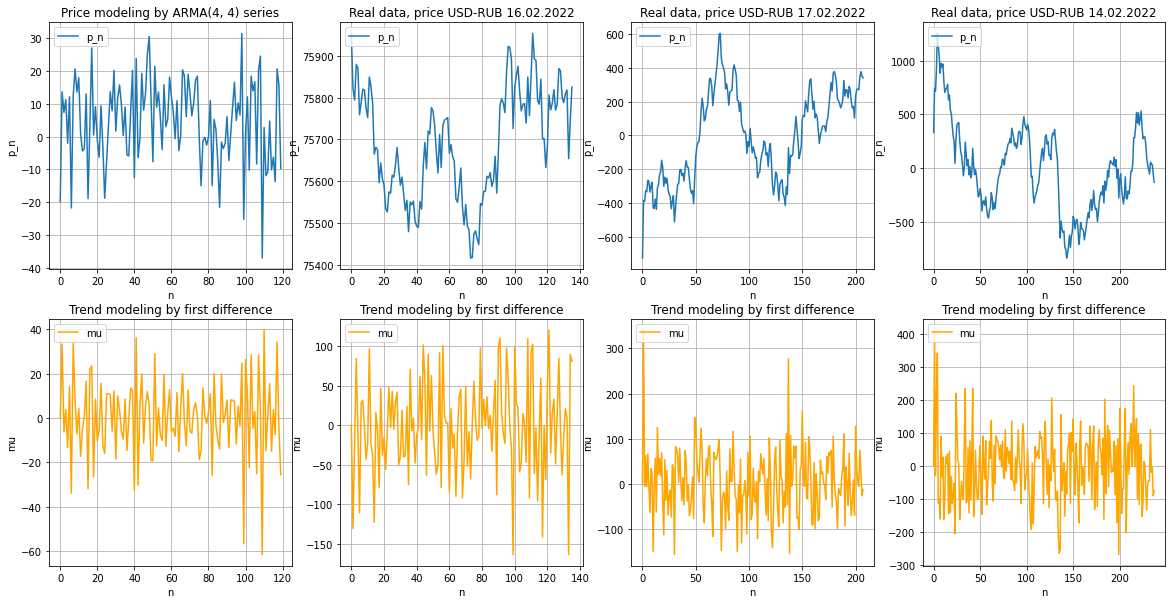

In [48]:
col_names = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7']

df_stable = pd.read_csv('trades-16-02-22.csv', sep=';', names=col_names)
col3_ser_stable = df_stable['col3']
col3_ser_stable.reset_index(drop=True, inplace=True)

df_growth = pd.read_csv('trades-17-02-22.csv', sep=';', names=col_names)
col3_ser_growth = df_growth['col3']
col3_ser_growth.reset_index(drop=True, inplace=True)

df_si_14 = pd.read_csv('trades-si-14-02-22.csv', sep=';', names=col_names)
col3_ser_si_14 = df_si_14['col3']
col3_ser_si_14.reset_index(drop=True, inplace=True)

df_si_21 = pd.read_csv('trades-si-21-02-22.csv', sep=';', names=col_names)
col3_ser_si_21 = df_si_21['col3']
col3_ser_si_21.reset_index(drop=True, inplace=True)


price_series_stable = np.array(col3_ser_stable)
# p_arr_stable = np.array([price_series_stable[i] - np.mean(price_series_stable) for i in range(len(price_series_stable)) if i % 5000 == 0 ])
p_arr_stable = np.array([price_series_stable[i] for i in range(len(price_series_stable)) if i % 5000 == 0 ])
# p_init_stable = price_series_stable[0] - np.mean(price_series_stable)
p_init_stable = price_series_stable[0]
mu_arr_stable = np.diff(p_arr_stable)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr_stable = np.append(0., mu_arr_stable)

price_series_growth = np.array(col3_ser_growth)
p_arr_growth = np.array([price_series_growth[i] - np.mean(price_series_growth) for i in range(len(price_series_growth)) if i % 5000 == 0 ])
p_init_growth = price_series_growth[0] - np.mean(price_series_growth)
mu_arr_growth = np.diff(p_arr_growth)
mu_arr_growth = np.append(0., mu_arr_growth)

price_series_si_14 = np.array(col3_ser_si_14)
p_arr_si_14 = np.array([price_series_si_14[i] - np.mean(price_series_si_14) for i in range(len(price_series_si_14)) if i % 5000 == 0 ])
p_init_si_14 = price_series_si_14[0] - np.mean(price_series_si_14)
mu_arr_si_14 = np.diff(p_arr_si_14)
mu_arr_si_14 = np.append(0., mu_arr_si_14)

price_series_si_21 = np.array(col3_ser_si_21)
p_arr_si_21 = np.array([price_series_si_21[i] - np.mean(price_series_si_21) for i in range(len(price_series_si_21)) if i % 5000 == 0 ])
p_init_si_21 = price_series_si_21[0] - np.mean(price_series_si_21)
mu_arr_si_21 = np.diff(p_arr_si_21)
mu_arr_si_21 = np.append(0., mu_arr_si_21)


fig = plt.figure(figsize=(20, 10))
n_lst = list(range(len(p_arr_arma)))
plt.subplot(241)
plt.title("Price modeling by ARMA(4, 4) series") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_arma)
plt.legend(['p_n'], loc="upper left")

plt.subplot(245)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_arma, color='orange')
plt.legend(['mu'], loc="upper left")


n_lst = list(range(len(p_arr_stable)))
plt.subplot(242)
plt.title("Real data, price USD-RUB 16.02.2022") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_stable)
plt.legend(['p_n'], loc="upper left")

plt.subplot(246)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_stable, color='orange')
plt.legend(['mu'], loc="upper left")

n_lst = list(range(len(p_arr_growth)))
plt.subplot(243)
plt.title("Real data, price USD-RUB 17.02.2022") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_growth)
plt.legend(['p_n'], loc="upper left")

plt.subplot(247)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_growth, color='orange')
plt.legend(['mu'], loc="upper left")

n_lst = list(range(len(p_arr_si_14)))
plt.subplot(244)
plt.title("Real data, price USD-RUB 14.02.2022") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_si_14)
plt.legend(['p_n'], loc="upper left")

plt.subplot(248)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_si_14, color='orange')
plt.legend(['mu'], loc="upper left")


fig.subplots_adjust(hspace=.2)

plt.show()




p_init = p_init_si_14
p_arr = p_arr_si_14
mu_arr = mu_arr_si_14




#p_init, p_arr, mu_arr 


## Alg0 v.0.1 

Работает в двух модификациях: 

1) без добавления шума, когда g(t) = E_g(t), т.е. функция выигрыша равна своему матожиданию. В этом случае для положительных I_0, K всегда положительно или равно 0, и это чисто бычья стратегия. Для отрицательных I_0 K всегда отрицательно или равно 0, и это чисто медвежья стратегия. Т.е. нет смены знака по ходу выполнения алгоритма, каким бы ни был входной тренд.

2) к матожиданию процесса при вычислении функции g(t) мы добавляем нормальный белый шум N(0, 10). В этом случае появляется знакопеременность у K, и стратегия становится смешанной.


Starting alg0, I_0 =  1
iter=1, t=1.0, I=0.0, mu=41.3 g=0.0, K=0.0 -> Nothing   I/K=nan
iter=2, t=2.0, I=0.0, mu=-2.9 g=0.0, K=0.0 -> Nothing   I/K=nan
iter=3, t=3.0, I=0.0, mu=19.6 g=85.0, K=10.0 -> Buy   I/K=0.0
iter=4, t=4.0, I=849.9994, mu=34.3 g=0.0, K=0.0 -> Nothing   I/K=inf
iter=5, t=5.0, I=849.9994, mu=-11.2 g=111.0, K=-10.0 -> Sell   I/K=-85.0
iter=6, t=6.0, I=-259.9998, mu=-9.8 g=29.0, K=10.0 -> Buy   I/K=-26.0
iter=7, t=7.0, I=30.0, mu=-16.0 g=0.0, K=0.0 -> Nothing   I/K=inf
iter=8, t=8.0, I=30.0, mu=9.0 g=0.0, K=0.0 -> Nothing   I/K=inf
iter=9, t=9.0, I=30.0, mu=-3.2 g=43.0, K=-10.0 -> Sell   I/K=-3.0
iter=10, t=10.0, I=-399.9997, mu=2.7 g=23.0, K=-10.0 -> Sell   I/K=40.0


C:\Users\litvi\AppData\Local\Temp\ipykernel_8284\1106255217.py:77: RuntimeWarning: invalid value encountered in double_scalars
  f'g={round(dg_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}   I/K={round(di_arr[i]/k_arr[i], 2)}')
C:\Users\litvi\AppData\Local\Temp\ipykernel_8284\1106255217.py:77: RuntimeWarning: divide by zero encountered in double_scalars
  f'g={round(dg_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}   I/K={round(di_arr[i]/k_arr[i], 2)}')


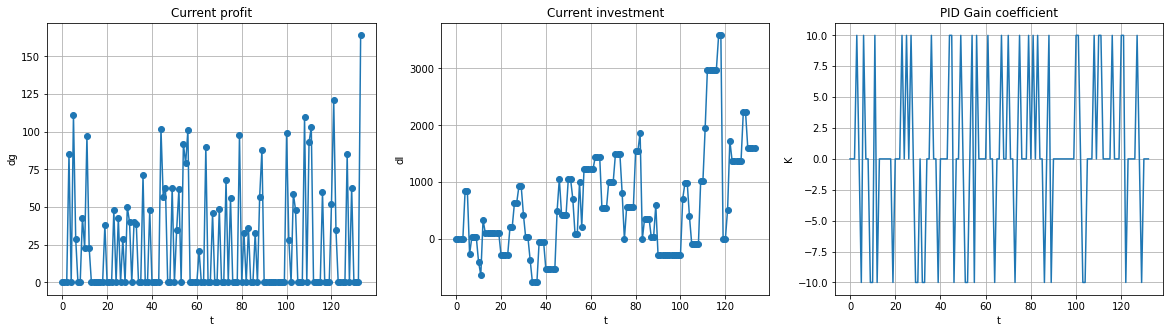

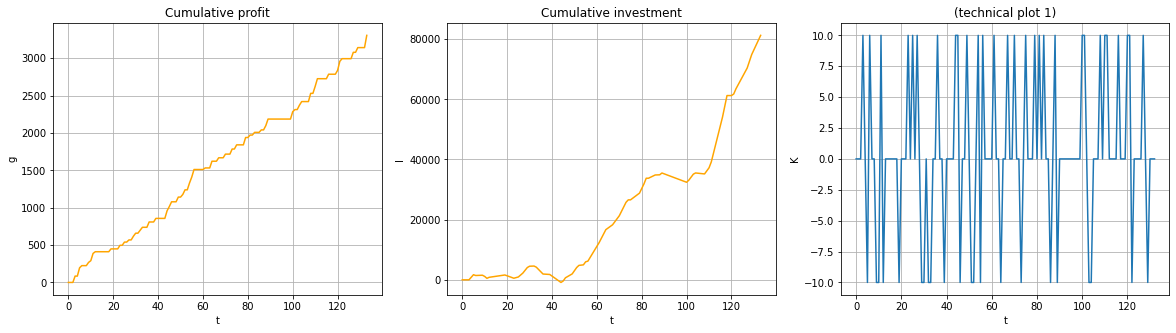

[0.0, 0.0, 0.0, 85.0, 0.0, 111.0, 29.0, 0.0, 0.0, 43.0, 23.0, 97.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 38.0, 0.0, 0.0, 0.0, 48.0, 0.0, 43.0, 0.0, 29.0, 0.0, 50.0, 40.0, 0.0, 40.0, 39.0, 0.0, 0.0, 71.0, 0.0, 0.0, 48.0, 0.0, 0.0, 0.0, 0.0, 102.0, 57.0, 63.0, 0.0, 0.0, 63.0, 0.0, 35.0, 62.0, 0.0, 92.0, 79.0, 101.0, 0.0, 0.0, 0.0, 0.0, 21.0, 0.0, 0.0, 90.0, 0.0, 0.0, 46.0, 0.0, 0.0, 49.0, 0.0, 0.0, 68.0, 0.0, 56.0, 0.0, 0.0, 0.0, 98.0, 0.0, 33.0, 0.0, 36.0, 0.0, 0.0, 33.0, 0.0, 57.0, 88.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.0, 28.0, 0.0, 59.0, 48.0, 0.0, 0.0, 0.0, 110.0, 0.0, 93.0, 103.0, 0.0, 0.0, 0.0, 0.0, 60.0, 0.0, 0.0, 0.0, 52.0, 121.0, 35.0, 0.0, 0.0, 0.0, 0.0, 85.0, 0.0, 63.0, 0.0, 0.0, 0.0, 164.0]
[0.0, 0.0, 0.0, 85.0, 85.0, 196.0, 225.0, 225.0, 225.0, 268.0, 291.0, 388.0, 411.0, 411.0, 411.0, 411.0, 411.0, 411.0, 411.0, 449.0, 449.0, 449.0, 449.0, 497.0, 497.0, 540.0, 540.0, 569.0, 569.0, 619.0, 659.0, 659.0, 699.0, 738.0, 738.0, 738.0, 809.0, 809.0, 809.0, 857.

array([75951, 75820, 75794, 75879, 75870, 75759, 75788, 75820, 75818,
       75775, 75752, 75849, 75826, 75788, 75665, 75681, 75676, 75597,
       75644, 75606, 75591, 75535, 75527, 75575, 75572, 75615, 75610,
       75639, 75681, 75631, 75591, 75610, 75570, 75531, 75555, 75480,
       75551, 75544, 75553, 75505, 75493, 75490, 75552, 75534, 75636,
       75693, 75630, 75720, 75713, 75776, 75768, 75733, 75671, 75620,
       75712, 75633, 75734, 75746, 75749, 75752, 75667, 75688, 75659,
       75648, 75558, 75550, 75586, 75632, 75540, 75496, 75545, 75493,
       75485, 75417, 75418, 75474, 75482, 75463, 75449, 75547, 75543,
       75576, 75576, 75612, 75608, 75621, 75588, 75603, 75660, 75572,
       75671, 75782, 75797, 75787, 75764, 75862, 75922, 75920, 75890,
       75726, 75825, 75853, 75875, 75816, 75768, 75783, 75786, 75739,
       75849, 75757, 75850, 75953, 75892, 75889, 75793, 75784, 75844,
       75702, 75702, 75633, 75685, 75806, 75771, 75786, 75819, 75770,
       75784, 75869,

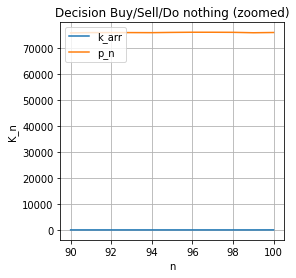

In [55]:
from math import fabs, exp
from scipy.optimize import minimize_scalar
import functools
import random


def minus_eg(k, _d_inv, _mu, _delta_t):
    """Функция Eg, которую мы максимизируем, взятая со знаком минус, потому что scipy.optimize ищет минимум."""
    res = -_mu*_d_inv/k*(exp(k*_mu*_delta_t) + exp(-k*_mu*_delta_t) - 2.)
    return res


def calc_alg0(_p_arr, _mu_arr, di0):
    n_max = len(_p_arr) - 1
    # Ограничения на K
    k_min = -10
    k_max = 10
    # Массивы
    t_max = float(n_max) # /100
    t_arr = np.linspace(0., t_max, n_max + 1)
    #dt = t_arr[1]-t_arr[0]
    dt = 1
    k_arr = np.zeros(n_max+1)
    dg_arr = np.zeros(n_max+1)
    di_arr = np.zeros(n_max+1)
    di_arr[0] = di0    
    print('Starting alg0, I_0 = ', di0)    
    # Задаем начальную инвестицию и профит
    """tm2, invm2, mum2, gm2, Km2,  = -2, inv_arr[0], 0., 0., 0.
    if Km2 > 0:
        desm2 = 'Buy'
    elif Km2 < 0:
        desm2 = 'Sell'
    else:
        desm2 = 'Nothing'
    print(f't={tm2}\t I={invm2}\t mu={mum2}\t g={gm2} \t K={Km2} -> {desm2}')
    
    tm1, invm1, Km1, gm1, mum1 = -1, inv_arr[0], 0., 0., 0.
    if Km1 > 0:
        desm1 = 'Buy'
    elif Km1 < 0:
        desm1 = 'Sell'
    else:
        desm1 = 'Nothing'
    print(f't={tm1}\t I={invm1}\t mu={mum1}\t g={gm1} \t K={Km1} -> {desm1}')
    """
    for i in range(1, n_max-1):
        des_str = ''
        if fabs(_mu_arr[i]) <= 1:
            k_arr[i] = 0.
            dg_arr[i] = 0.
            des_str = 'Nothing'
            di_arr[i+1] = 0. 
        else:            
            mu_normalized = mu_arr[i]/10
            minus_eg_cur = functools.partial(minus_eg, _d_inv=di_arr[i], _mu = mu_normalized, _delta_t=dt)
            """k_line = np.linspace(k_min, k_max, 100)
            f = np.array([minus_eg_cur(k)for k in k_line])
            plt.plot(k_line, f)
            plt.show()"""
            k_cur = minimize_scalar(minus_eg_cur, bounds=(k_min, k_max), method='bounded').x 
            k_arr[i] = k_cur
            dg_arr[i] = k_cur/fabs(k_cur)*(_p_arr[i] - _p_arr[i-1])
            
            if dg_arr[i] < 20:
                k_arr[i] = 0
                dg_arr[i] = 0
                des_str = 'Nothing'
            else: 
                if k_cur >= 0:
                    des_str = 'Buy'
                else:
                    des_str = 'Sell'    
            di_arr[i+1] = di_arr[i] + k_arr[i]*dg_arr[i]
            if i <= 10:
                 print(f'iter={i}, t={round(t_arr[i], 2)}, I={round(di_arr[i], 4)}, mu={round(mu_normalized, 4)}',
                       f'g={round(dg_arr[i], 4)}, K={round(k_arr[i], 4)} -> {des_str}   I/K={round(di_arr[i]/k_arr[i], 2)}')    
    dk_ser = pd.Series(k_arr[:-2], index=t_arr[:-2])
    dg_ser = pd.Series(dg_arr[:-2], index=t_arr[:-2])
    di_ser = pd.Series(di_arr[:-2], index=t_arr[:-2])
    # print(di_arr)
    plt.figure(figsize=(20, 5))
    plt.subplot(131)
    plt.plot(dg_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("dg")
    plt.title("Current profit")
    plt.grid()     
    plt.subplot(132)
    plt.plot(di_ser[:n_max-2], marker='o')
    plt.xlabel("t")
    plt.ylabel("dI")
    plt.title("Current investment")
    plt.grid()     
    plt.subplot(133)
    plt.plot(k_arr[:n_max-2])
    plt.xlabel("t")
    plt.ylabel("K")
    plt.title("PID Gain coefficient")
    plt.grid()
    plt.show()    

    
    plt.figure(figsize=(20, 5))
    # plt.tight_layout()
    plt.subplot(131)
    plt.plot(np.cumsum(dg_ser[:n_max-2]), color='orange')
    plt.xlabel("t")
    plt.ylabel("g")
    plt.title("Cumulative profit")
    plt.grid()     
    plt.subplot(132)
    plt.plot(np.cumsum(di_ser[:n_max-2]), color='orange')
    plt.xlabel("t")
    plt.ylabel("I")
    plt.title("Cumulative investment")
    plt.grid()     
    plt.subplot(133)
    plt.plot(k_arr[:n_max-2])
    plt.xlabel("t")
    plt.ylabel("K")
    plt.title("(technical plot 1)")
    plt.grid()
    # plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()    
    
    figure = plt.figure(figsize=(4, 4))
    plt.title("Decision Buy/Sell/Do nothing (zoomed)") # заголовок
    plt.xlabel("n") # ось абсцисс
    plt.ylabel("K_n") # ось ординат
    plt.grid()      # включение отображение сетки
    # plt.plot(p_ser)  # построение графика
    plt.plot(n_lst[90:101], k_arr[90:101])
    plt.plot(n_lst[90:101], _p_arr[90:101])
    plt.legend(['k_arr','p_n'], loc="upper left")
    
    print(list(dg_ser))
    print(list(np.cumsum(dg_ser)))
    
    

"""
# Три разных случая
# 1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0
print('1. I_0 > 0, g(t) = Eg(t) -> I_0 = 10, xi = 0:')
calc_alg0(p_arr, mu_arr, 10)
print('='*10)
print()
print()

# 2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0
print('2. I_0 < 0, g(t) = Eg(t) -> I_0 = -10, xi = 0:')
calc_alg0(p_arr, mu_arr, -10)
print('='*10)
print()
print()

# 3. I_0 любое, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise = 10, lambda: .1*np.random.normal(0, 1)    
print('3. I_0=10, g(t) = Eg(t) + xi(t) (белый шум) -> I_0 = 10, xi_noise -- белый шум 0.1*N(0,1):')
xi_noise = lambda: .1*np.random.normal(0, 1)  
calc_alg0(p_arr, mu_arr, 10, xi_noise)    
print('='*10)
print()
print()
"""

# di0 = 1
# xi_noise = lambda: -10.*np.random.normal(0, 20)  
# calc_alg0(p_arr_si_21[:200], mu_arr_si_21[:200], 1)
calc_alg0(p_arr_stable, mu_arr_stable, 1)
p_arr_stable


In [26]:
di0 = 1
# xi_noise = lambda: -10.*np.random.normal(0, 20)  
# calc_alg0(p_arr, mu_arr, di0)


In [27]:
di0 = 1
# xi_noise = lambda: -10.*np.random.normal(0, 20)
# calc_alg0(p_arr_growth, mu_arr_growth, di0)

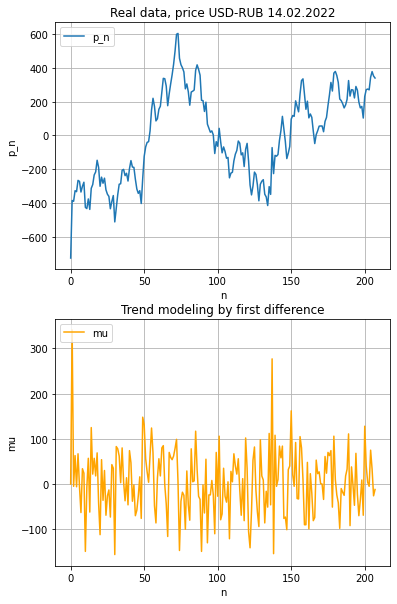

In [16]:
df_si_14 = pd.read_csv('trades-si-14-02-22.csv', sep=';', names=col_names)
col3_ser_si_14 = df_growth['col3']
col3_ser_si_14.reset_index(drop=True, inplace=True)

price_series_si_14 = np.array(col3_ser_si_14)
p_arr_si_14 = np.array([price_series_si_14[i] - np.mean(price_series_si_14) for i in range(len(price_series_si_14)) if i % 5000 == 0 ])
p_init_si_14 = price_series_si_14[0] - np.mean(price_series_si_14)
mu_arr_si_14 = np.diff(p_arr_si_14)
# Сдвигаем разницу на одну единицу вперед (чтобы тренд был в конце интервала, а не в начале)
mu_arr_si_14 = np.append(0., mu_arr_si_14)

n_lst = list(range(len(p_arr_si_14)))
fig = plt.figure(figsize=(6, 10))
plt.subplot(211)
plt.title("Real data, price USD-RUB 14.02.2022") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("p_n") # ось ординат
plt.grid()      # включение отображение сетки
# plt.plot(p_ser)  # построение графика
plt.plot(n_lst, p_arr_si_14)
plt.legend(['p_n'], loc="upper left")

plt.subplot(212)
plt.title("Trend modeling by first difference") # заголовок
plt.xlabel("n") # ось абсцисс
plt.ylabel("mu") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(n_lst, mu_arr_si_14, color='orange')
plt.legend(['mu'], loc="upper left")


In [28]:
print(p_arr_si_14, mu_arr_si_14, len(p_arr_si_14))

p_arr = p_arr_si_14
mu_arr = mu_arr_si_14


di0 = 1
# xi_noise = lambda: -10.*np.random.normal(0, 20)
# calc_alg0(p_arr_si_14, mu_arr_si_14, 1)

[ 331.1574889  744.1574889  715.1574889  911.1574889 1254.1574889
 1142.1574889 1044.1574889  884.1574889  974.1574889  942.1574889
  969.1574889  808.1574889  706.1574889  734.1574889  743.1574889
  780.1574889  635.1574889  680.1574889  539.1574889  508.1574889
  394.1574889  301.1574889  249.1574889   44.1574889  265.1574889
  400.1574889  417.1574889  425.1574889  263.1574889  163.1574889
  117.1574889   29.1574889  -71.8425111    6.1574889  241.1574889
  130.1574889   22.1574889   78.1574889  -63.8425111   13.1574889
  -89.8425111  -50.8425111  184.1574889   31.1574889  -60.8425111
  -12.8425111  -69.8425111 -166.8425111 -267.8425111 -252.8425111
 -189.8425111 -253.8425111 -399.8425111 -308.8425111 -305.8425111
 -344.8425111 -267.8425111 -384.8425111 -446.8425111 -465.8425111
 -390.8425111 -366.8425111 -227.8425111 -280.8425111 -386.8425111
 -323.8425111 -377.8425111 -285.8425111 -202.8425111 -126.8425111
  -71.8425111  -52.8425111   11.1574889    9.1574889   85.1574889
   66.1574